In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 

In [95]:
store_data = pd.read_csv('C:/Users/rodri/OneDrive/Escritorio/PREDICTOR_VENTAS_ROSSMANN/data/raw/store.csv')
train_data = pd.read_csv('C:/Users/rodri/OneDrive/Escritorio/PREDICTOR_VENTAS_ROSSMANN/data/raw/train.csv') 
test_data = pd.read_csv('C:/Users/rodri/OneDrive/Escritorio/PREDICTOR_VENTAS_ROSSMANN/data/raw/test.csv') 

C:\Users\rodri\AppData\Local\Temp\ipykernel_17760\903302138.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('C:/Users/rodri/OneDrive/Escritorio/PREDICTOR_VENTAS_ROSSMANN/data/raw/train.csv')


In [29]:
# store.csv 

In [96]:
store_data.fillna(method='ffill', inplace=True) 

C:\Users\rodri\AppData\Local\Temp\ipykernel_17760\831556641.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  store_data.fillna(method='ffill', inplace=True)


In [31]:
# test.csv

In [97]:
test_data['Date'] = pd.to_datetime(test_data['Date']) 

In [32]:
# train.csv

In [98]:
train_data['Date'] = pd.to_datetime(train_data['Date']) 

In [99]:
describe_train = train_data.describe() 
describe_train 

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,2014-04-11 01:30:42.846061824,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
min,1.000000e+00,1.000000e+00,2013-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,2013-08-17 00:00:00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,2014-04-02 00:00:00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,2014-12-12 00:00:00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,2015-07-31 00:00:00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01


In [100]:
train_data['Open'].fillna(1, inplace=True) 

C:\Users\rodri\AppData\Local\Temp\ipykernel_17760\1179608501.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Open'].fillna(1, inplace=True)


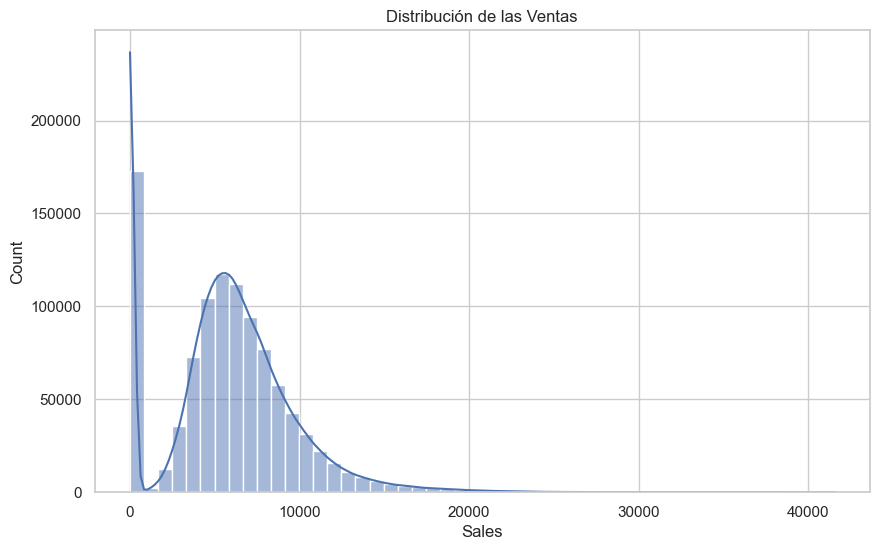

In [101]:
plt.figure(figsize=(10,6))
sns.histplot(train_data['Sales'], bins=50, kde=True)
plt.title('Distribución de las Ventas')
plt.show() 

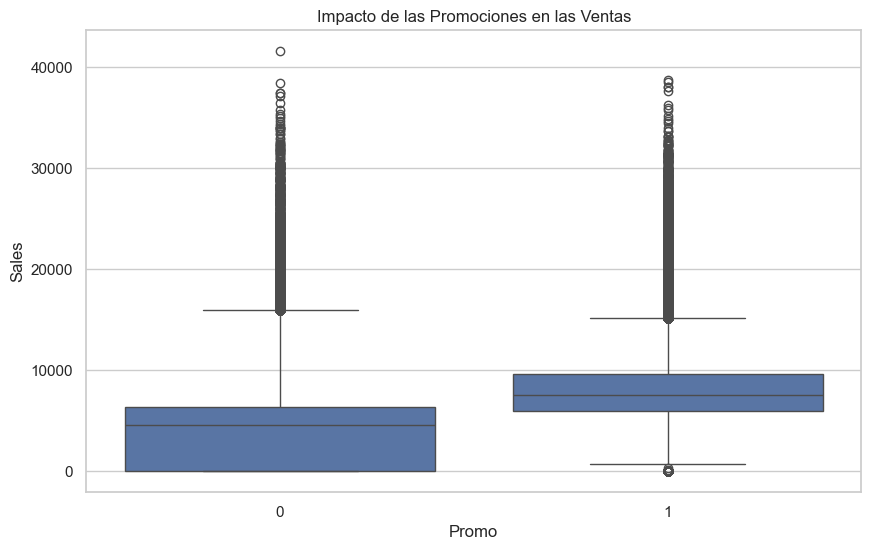

In [102]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Promo', y='Sales', data=train_data)
plt.title('Impacto de las Promociones en las Ventas') 
plt.show() 

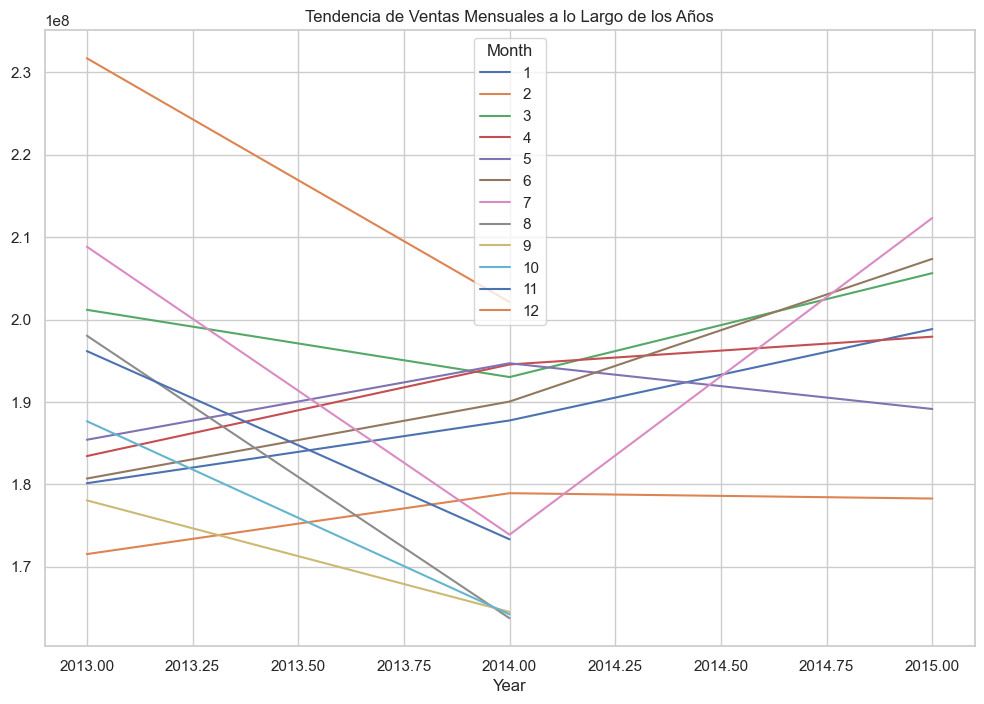

In [103]:
train_data['Year'] = train_data['Date'].dt.year
train_data['Month'] = train_data['Date'].dt.month
sales_trend = train_data.groupby(['Year', 'Month'])['Sales'].sum().unstack()
sales_trend.plot(kind='line', figsize=(12,8))
plt.title('Tendencia de Ventas Mensuales a lo Largo de los Años')
plt.show() 

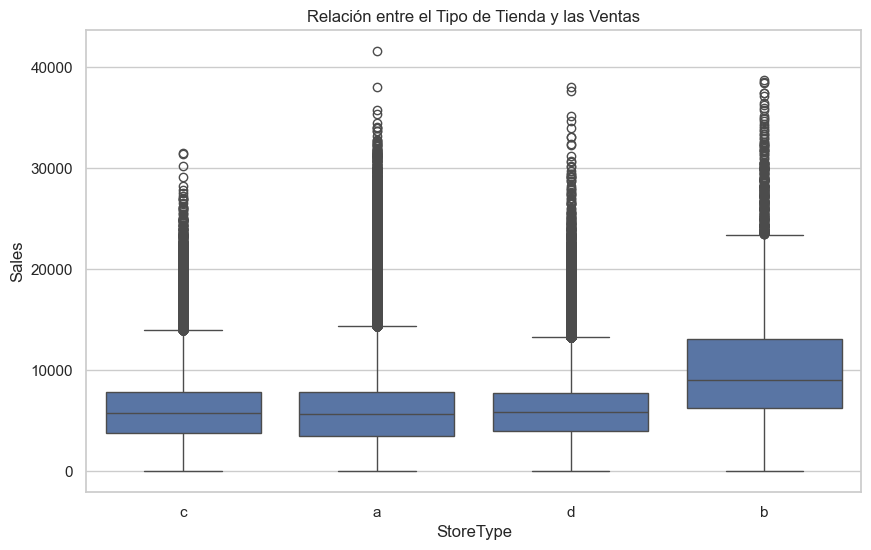

In [104]:
store_sales = pd.merge(train_data, store_data, on='Store')
plt.figure(figsize=(10,6))
sns.boxplot(x='StoreType', y='Sales', data=store_sales)
plt.title('Relación entre el Tipo de Tienda y las Ventas')
plt.show() 

In [105]:
train_data['DayOfWeek'] = train_data['Date'].dt.dayofweek 
train_data['WeekOfYear'] = train_data['Date'].dt.isocalendar().week 
train_data['IsHoliday'] = np.where((train_data['StateHoliday'] != '0') | (train_data['SchoolHoliday'] == 1), 1, 0) 

In [106]:
train_data = train_data.sort_values(by=['Store', 'Date'])
train_data['Sales_Lag1'] = train_data.groupby('Store')['Sales'].shift(1)
train_data['Sales_Lag1'].fillna(0, inplace=True) 

C:\Users\rodri\AppData\Local\Temp\ipykernel_17760\3061318374.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Sales_Lag1'].fillna(0, inplace=True)


In [107]:
print(train_data[['Date', 'Store', 'Sales', 'Sales_Lag1']].head(15)) 

              Date  Store  Sales  Sales_Lag1
1016095 2013-01-01      1      0         0.0
1014980 2013-01-02      1   5530         0.0
1013865 2013-01-03      1   4327      5530.0
1012750 2013-01-04      1   4486      4327.0
1011635 2013-01-05      1   4997      4486.0
1010520 2013-01-06      1      0      4997.0
1009405 2013-01-07      1   7176         0.0
1008290 2013-01-08      1   5580      7176.0
1007175 2013-01-09      1   5471      5580.0
1006060 2013-01-10      1   4892      5471.0
1004945 2013-01-11      1   4881      4892.0
1003830 2013-01-12      1   4952      4881.0
1002715 2013-01-13      1      0      4952.0
1001600 2013-01-14      1   4717         0.0
1000485 2013-01-15      1   3900      4717.0


In [108]:
train_data = train_data[train_data['Sales'] > 0] 

In [109]:
train_data.fillna(0, inplace=True) 

In [110]:
train_data = pd.get_dummies(train_data, columns=['StateHoliday'], drop_first=True) 

In [117]:
store_data.to_csv('C:/Users/rodri/OneDrive/Escritorio/PREDICTOR_VENTAS_ROSSMANN/data/processed/store_data_processed.csv')
train_data.to_csv('C:/Users/rodri/OneDrive/Escritorio/PREDICTOR_VENTAS_ROSSMANN/data/processed/train_data_processed.csv')
test_data.to_csv('C:/Users/rodri/OneDrive/Escritorio/PREDICTOR_VENTAS_ROSSMANN/data/processed/test_data_processed.csv') 